In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sb

In [4]:
%matplotlib inline

In [5]:
address = '/Users/armenhakobyan/Boston_housing_project/dataset/boston_new.csv'

In [6]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(address, delim_whitespace=True, header=None, names=col_names)

In [7]:
#read the data

In [8]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
data.shape

(506, 14)

In [10]:
data.MEDV.min()

5.0

In [11]:
data.MEDV.max()

50.0

In [12]:
np.min(data.MEDV)

5.0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [14]:
#describe the data

In [15]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
#correlations

In [17]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

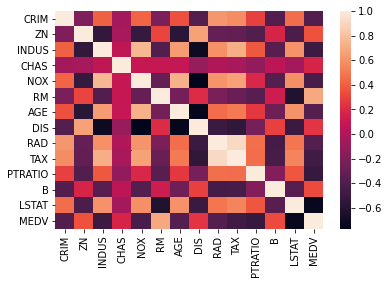

In [18]:
sb.heatmap(data.corr())

In [89]:
#pairplot

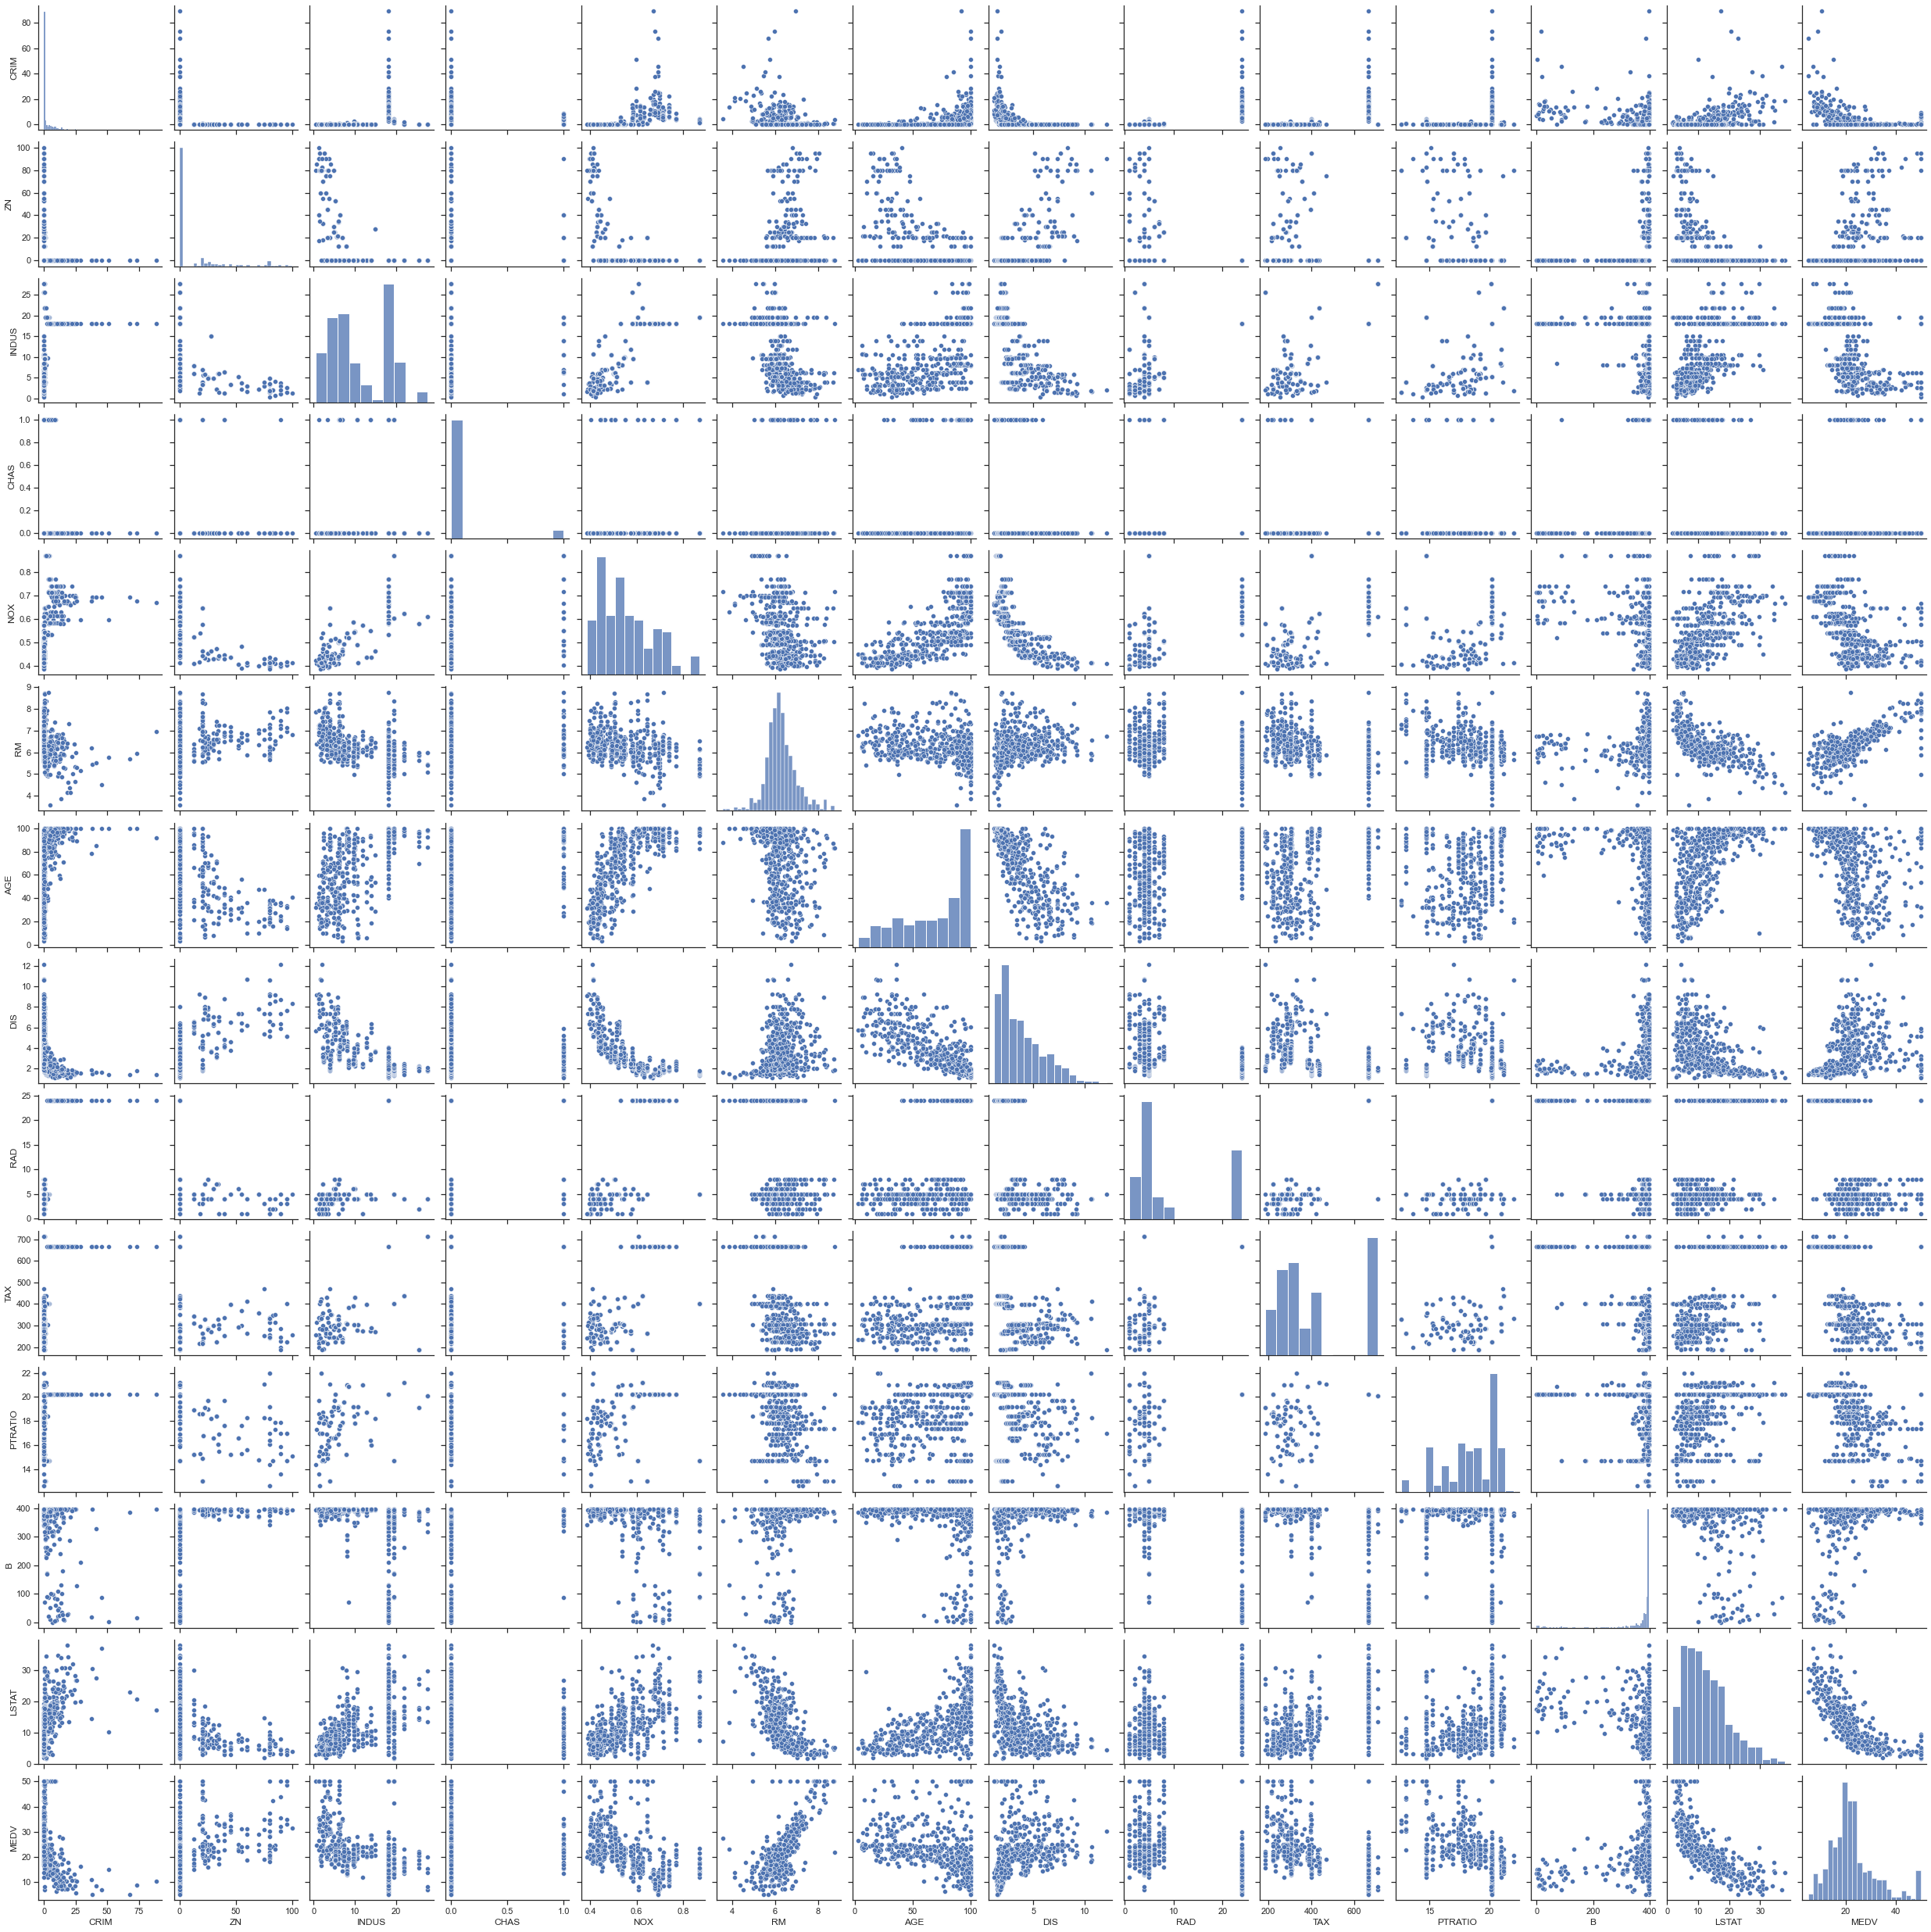

In [90]:
sb.set_theme(style="ticks")
sb.pairplot(data)

In [19]:
X = data.drop('MEDV', axis=1)
y = data['MEDV']

In [20]:
#plot

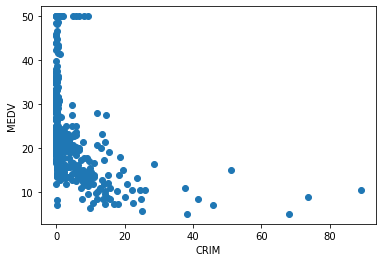

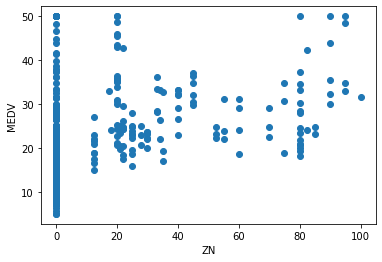

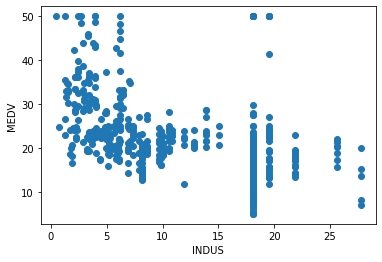

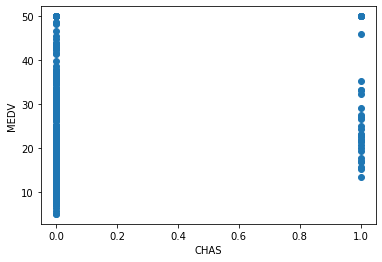

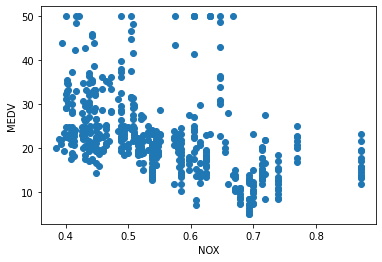

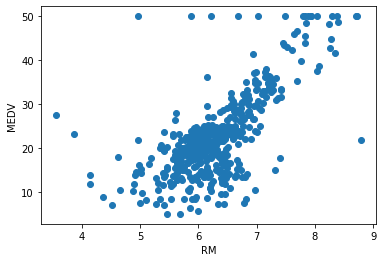

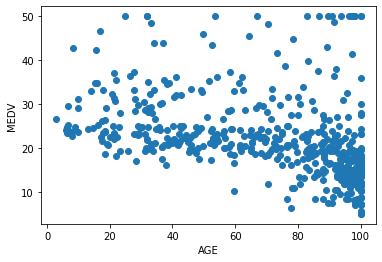

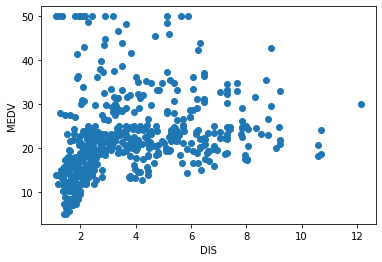

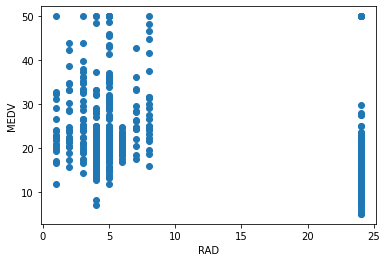

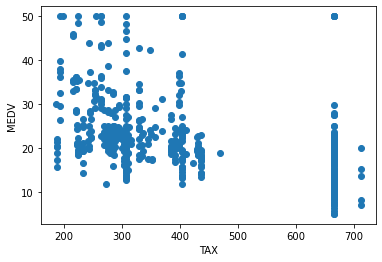

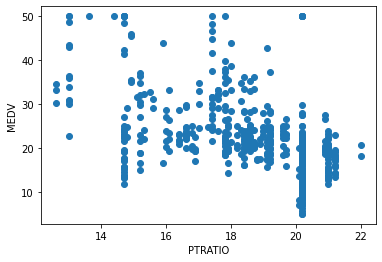

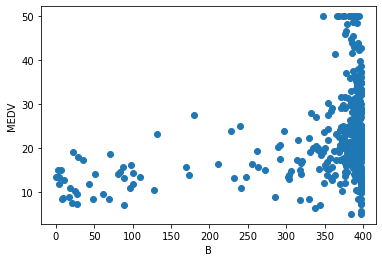

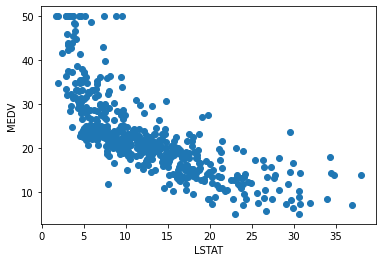

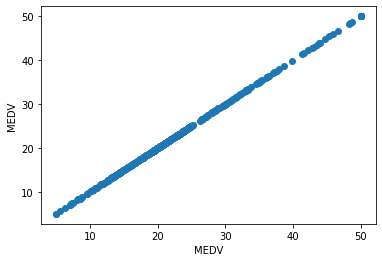

In [21]:
for i in col_names:
    plt.scatter(data[i], y)
    plt.xlabel(i)
    plt.ylabel('MEDV')
    plt.show()

In [22]:
#develope a model with all features

In [23]:
#split the data

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [27]:
y_pred = d_tree.predict(X_test)

In [28]:
np.sqrt(mean_squared_error(y_test, y_pred))

3.742914875428759

In [29]:
d_tree.score(X_test, y_test)

0.821477522279006

In [30]:
#drop some features with low correlation

In [31]:
new_X = X.drop(['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RAD', 'B',  'DIS', 'TAX'], axis=1)

In [32]:
new_X.head()

,RM,AGE,PTRATIO,LSTAT
0,6.575,65.2,15.3,4.98
1,6.421,78.9,17.8,9.14
2,7.185,61.1,17.8,4.03
3,6.998,45.8,18.7,2.94
4,7.147,54.2,18.7,5.33


In [33]:
#develope a new model with these features

In [34]:
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2)

In [35]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
y_pred = d_tree.predict(X_test)

In [36]:
np.sqrt(mean_squared_error(y_test, y_pred))

5.286024860282954

In [37]:
d_tree.score(X_test, y_test)

0.6553742487244715

In [38]:
r2_score(y_test, y_pred)

0.6553742487244715

In [39]:
 #detect and remove outliers 

In [40]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:xlabel='LSTAT'>

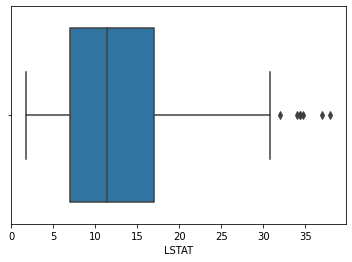

In [49]:
sb.boxplot(data['LSTAT'])

/Users/armenhakobyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RM'>

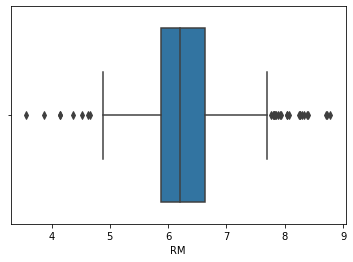

In [50]:
sb.boxplot(data['RM'])

/Users/armenhakobyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AGE'>

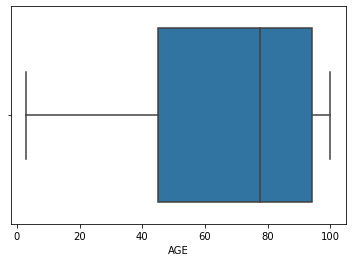

In [51]:
sb.boxplot(data['AGE'])

/Users/armenhakobyan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PTRATIO'>

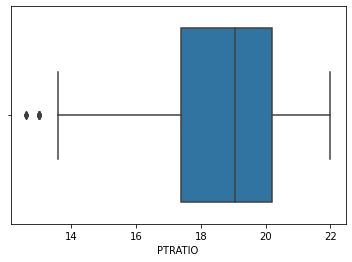

In [52]:
sb.boxplot(data['PTRATIO'])

In [55]:
data = data[data['RM'].apply(lambda x:  x < 7.8 and x > 4.7)]
data = data[data['LSTAT'].apply(lambda x:  x < 31)]
data = data[data['PTRATIO'].apply(lambda x:  x > 13.5)]

data.shape

(461, 14)

In [56]:
#try to predict again

In [57]:
new_X = X.drop(['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RAD', 'B',  'DIS', 'TAX'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(new_X, y, test_size=0.2)
d_tree_new = DecisionTreeRegressor()
d_tree_new.fit(X_train, y_train)
y_pred = d_tree_new.predict(X_test)
d_tree_new.score(X_test, y_test)

0.7453753878564608

In [58]:
#try RandomForests

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
rand_forest = RandomForestRegressor()

In [61]:
rand_forest.fit(X_train, y_train)
rand_forest.score(X_test, y_test)

0.819417918733043

In [62]:
#try KNN

In [65]:
from sklearn.neighbors import KNeighborsRegressor

In [73]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.6484875700965864

In [74]:
#try svm

In [76]:
from sklearn.svm import SVR

In [77]:
svr = SVR()
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.3459423260947043